## Homework 01: due 2022/03/10 00:00

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [114]:
# Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [115]:
# Plotting function (you can modify this block to change the figure)
def plot_svc_decision_function(model, ax=None, mode='train'):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1. Kernel function and hyper paramters of support vector machine. 
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the figure example:
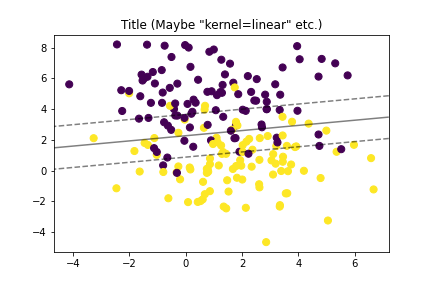

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default.

In [123]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=2)

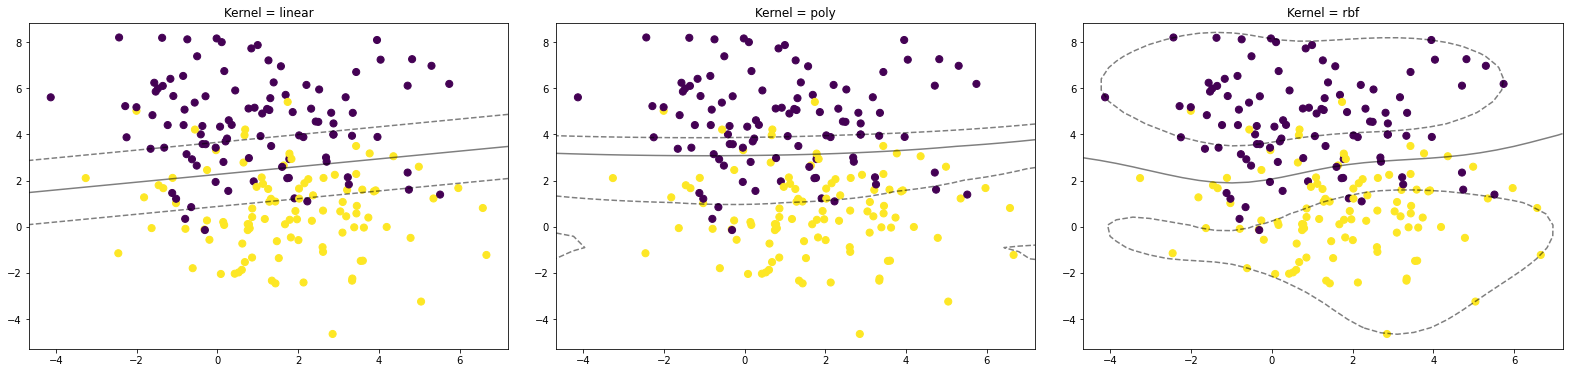

In [124]:
kernels = ['linear', 'poly', 'rbf']
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, k in zip(ax, kernels):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('Kernel = {0}'.format(k))
    model = SVC(kernel=k)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

In [125]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)

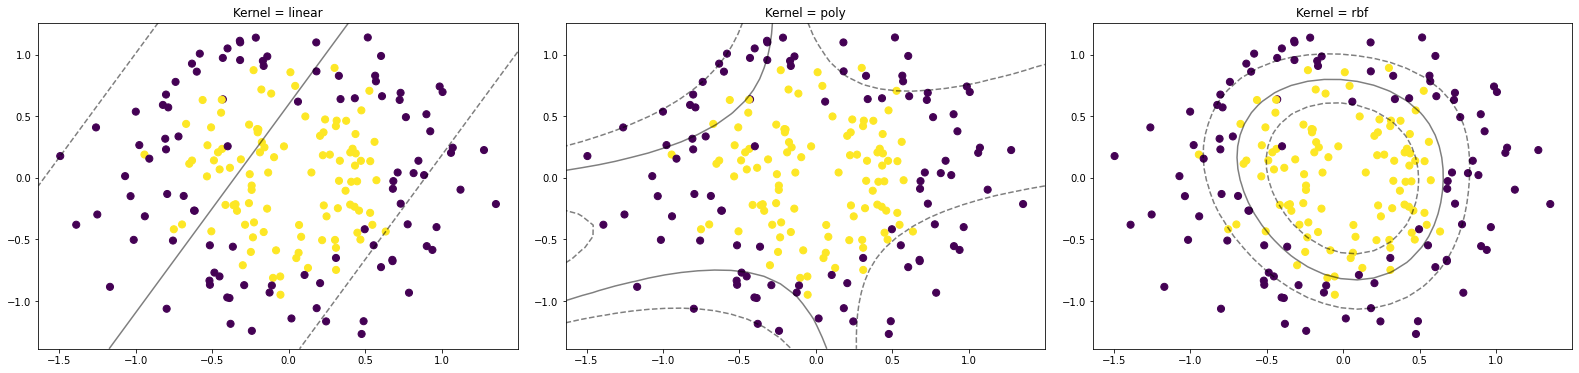

In [126]:
kernels = ['linear', 'poly', 'rbf']
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, k in zip(ax, kernels):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('Kernel = {0}'.format(k))
    model = SVC(kernel=k)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.001 & 10000*** at least, and you can try more values of ***C*** to prove your observation. 

In [127]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

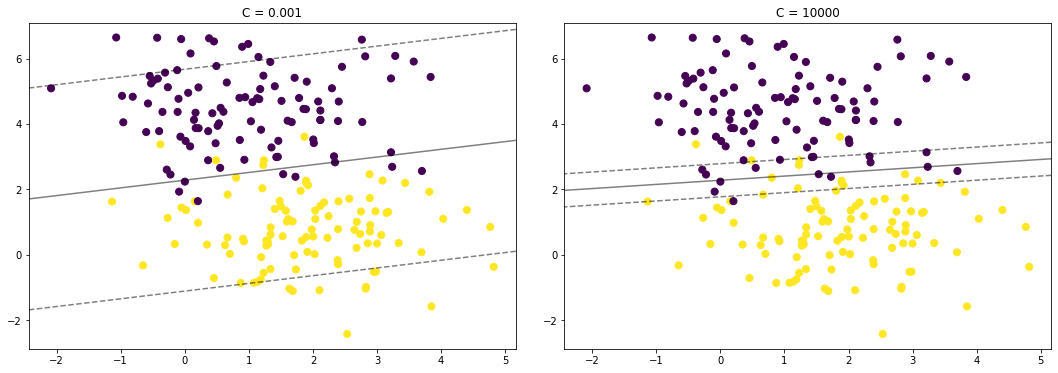

In [128]:
C = [1E-3, 10000]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, c in zip(ax, C):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('C = {0}'.format(c))
    model = SVC(kernel='linear', C=c)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 10*** at least, and you can try more values of ***degree*** to prove your observation.

In [129]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

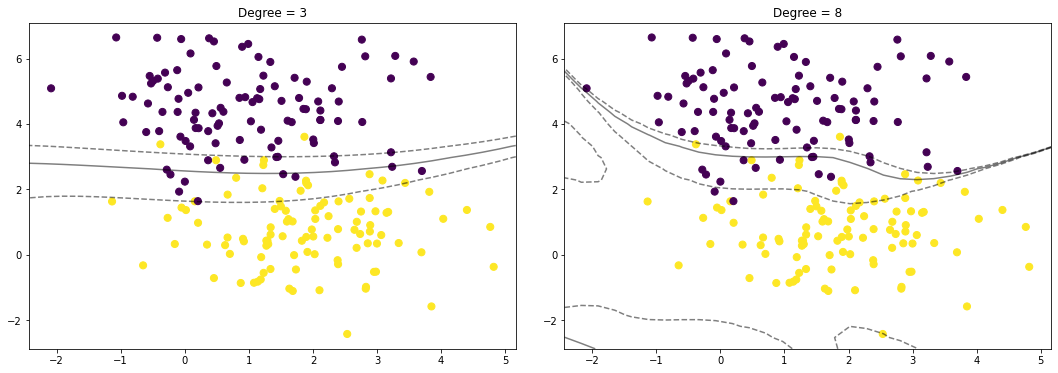

In [130]:
degrees = [3, 8]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, degree in zip(ax, degrees):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('Degree = {0}'.format(degree))
    model = SVC(kernel='poly', degree=degree)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 10*** at least, and you can try more values of ***gamma*** to prove your observation.

In [131]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=0)

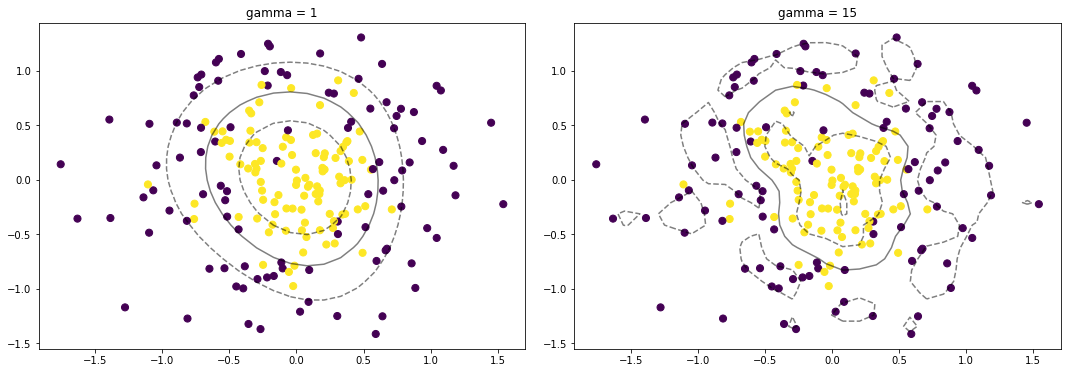

In [132]:
gammas = [1, 15]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, gamma in zip(ax, gammas):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('gamma = {0}'.format(gamma))
    model = SVC(kernel='rbf', gamma=gamma)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

### 2. Model evaluation and hyper parameters searching.
#### Please make the scatter plots of data, visualize the hyperplane, support vector and margin and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the figure example:
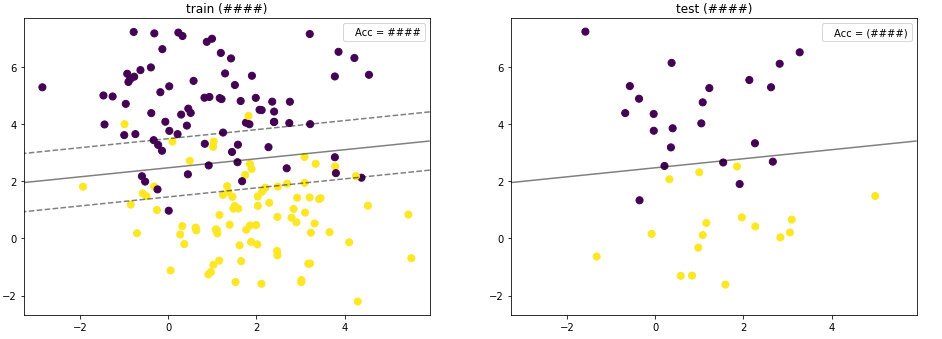

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0)

In [135]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

In [136]:
workflow = ['train', 'test']

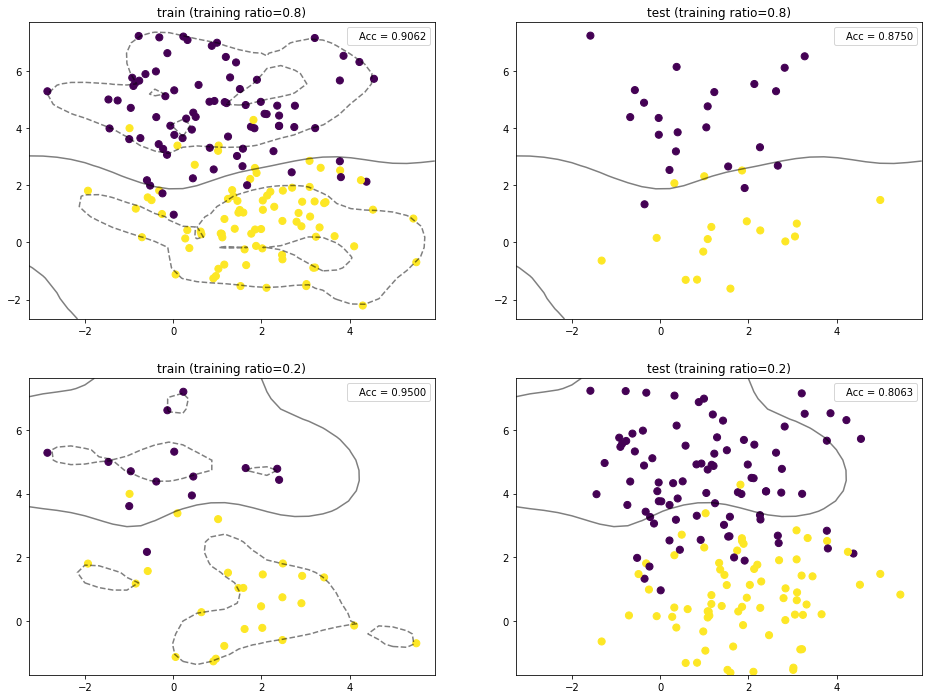

In [137]:
model_ratio = [0.8, 0.2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=0)
model = SVC(kernel='rbf', gamma='auto')
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, ratio in enumerate(model_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = ratio, random_state=0)
    for j, mode in enumerate(workflow):
        if mode == 'train':
            model.fit(X_train, y_train)
            ax[i][j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, label="Acc = %.4f" %(model.score(X_train, y_train)))
            ax[i][j].set_title(f"{mode} (training ratio={ratio})")
            xlim = ax[i][j].get_xlim()
            ylim = ax[i][j].get_ylim()
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)
        else:
            ax[i][j].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, label="Acc = %.4f" %(model.score(X_test, y_test)))
            ax[i][j].set_title(f"{mode} (training ratio={ratio})")
            ax[i][j].set_xlim(xlim)
            ax[i][j].set_ylim(ylim)
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)

##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0)

In [138]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

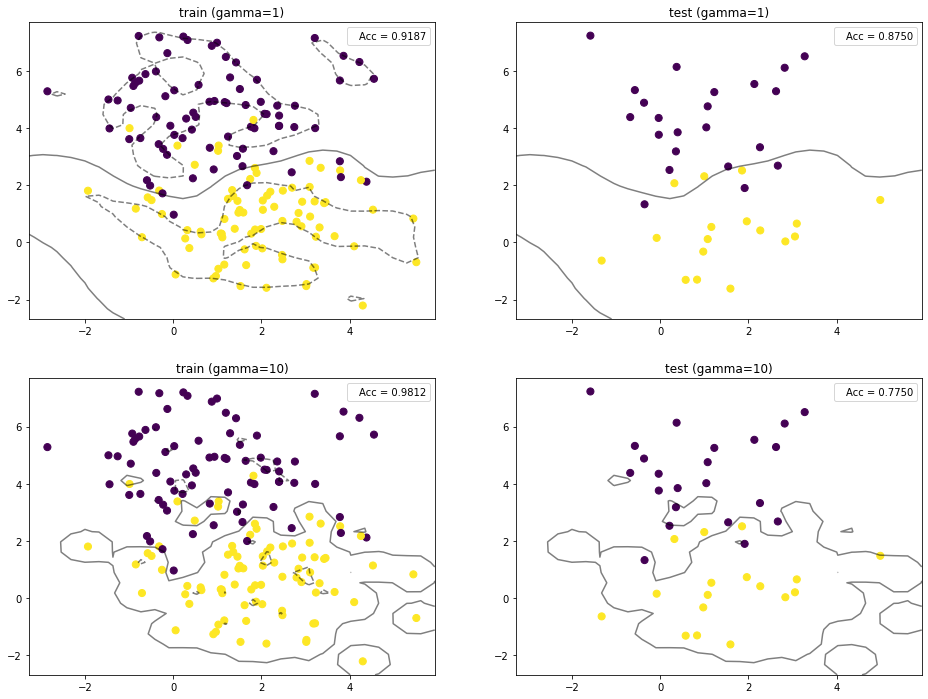

In [139]:
gammas = [1, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, gamma in enumerate(gammas):
    model = SVC(kernel='rbf', gamma=gamma)
    for j, mode in enumerate(workflow):
        if mode == 'train':
            model.fit(X_train, y_train)
            ax[i][j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, label="Acc = %.4f" %(model.score(X_train, y_train)))
            ax[i][j].set_title(f'{mode} (gamma={gamma})')
            xlim = ax[i][j].get_xlim()
            ylim = ax[i][j].get_ylim()
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)
        else:
            ax[i][j].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, label="Acc = %.4f" %(model.score(X_test, y_test)))
            ax[i][j].set_title(f'{mode} (gamma={gamma})')
            ax[i][j].set_xlim(xlim)
            ax[i][j].set_ylim(ylim)
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)

##### 2.3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score.
| | 01 | 02 | 03 | 04 |
|:---:|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | -| -|
|***C***| 0.1 | 1 | 10|100|
|***gamma***| 1 | 0.1 | 0.01|0.001|

In [140]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1, 0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}
clf_grid = GridSearchCV(SVC(), param_grid, cv=2, n_jobs=5, verbose=2)
clf_grid.fit(X, y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done  87 out of  96 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:    4.2s finished


GridSearchCV(cv=2, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [142]:
model = clf_grid.best_estimator_
print(model.get_params())

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


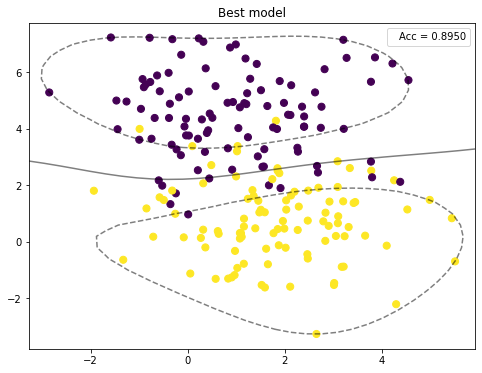

In [143]:
fig, ax= plt.subplots(1, 1, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, label="Acc = %.4f" %(model.score(X, y)))
plt.title('Best model')
plot_svc_decision_function(model, ax)
plt.legend(markerscale=0, handlelength=0)
plt.show()

### 3. Fitting the SVM by the real data.
#### This question will fit the SVM with real raw data. Try the technique above to reach the highest score.

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling .

##### Here is the example of figure:
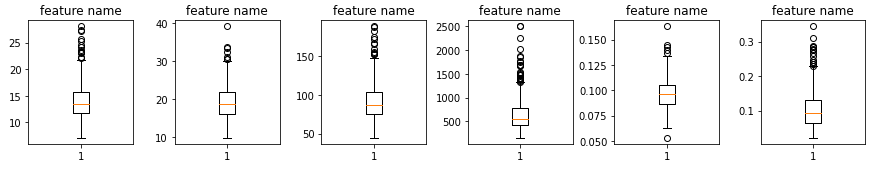

In [144]:
# Do not change the data
data = load_breast_cancer()
X = data.data
y = data.target
name = data.feature_names

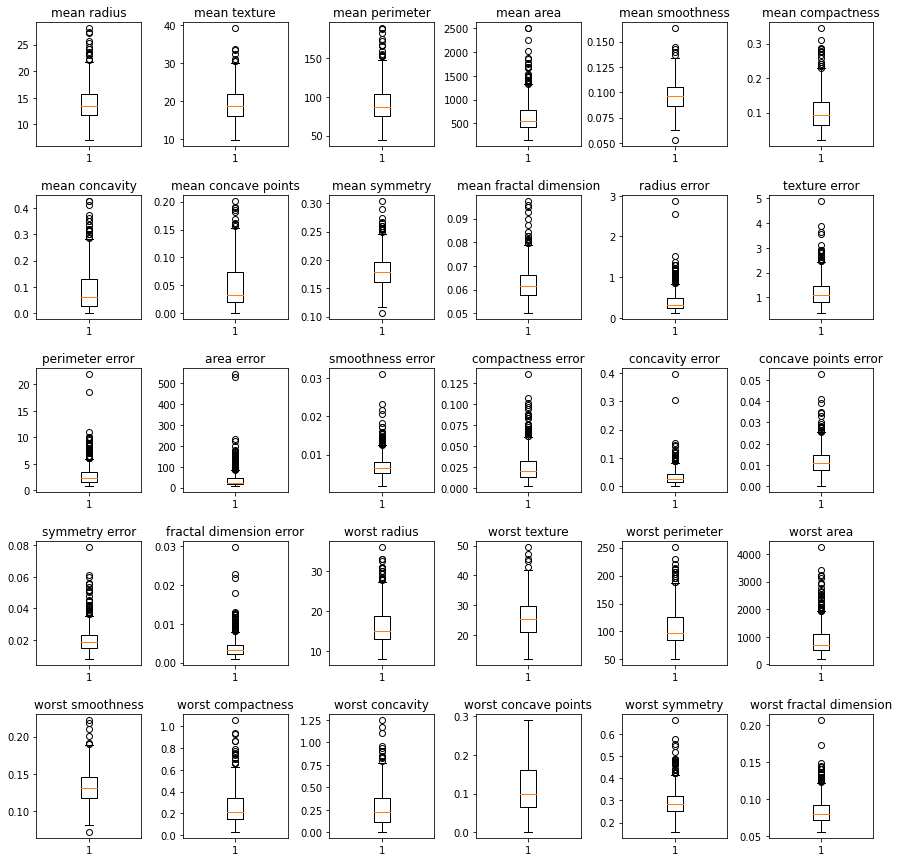

In [145]:
n = X.shape[1]
fig, axs = plt.subplots(5, 6, figsize = (15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n):
    axs[int(i/6)][i%6].boxplot(X[:,i])
    axs[int(i/6)][i%6].set_title(name[i])

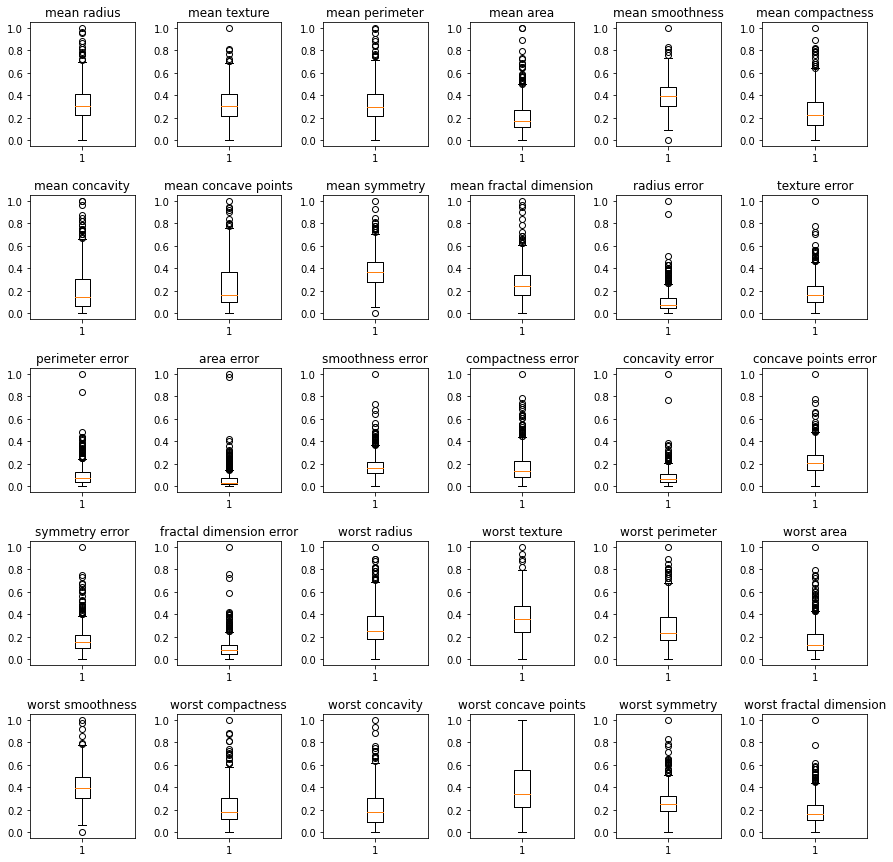

In [146]:
from sklearn.preprocessing import MinMaxScaler
transformed_X = MinMaxScaler().fit_transform(X)
n = transformed_X.shape[1]
fig, axs = plt.subplots(5, 6, figsize = (15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n):
    axs[int(i/6)][i%6].boxplot(transformed_X[:,i])
    axs[int(i/6)][i%6].set_title(name[i])

##### 3-2  Please split the data with traing ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with defferent decision threshold)

In [147]:
train_x, test_x, train_y, test_y = train_test_split(transformed_X, y, train_size = 0.8, random_state=0)

In [148]:
models = [('rbf', SVC(kernel='rbf', C=1, gamma='auto', probability=True)),
          ('linear', SVC(kernel='linear', C=1, probability=True)), 
          ('poly', SVC(kernel='poly', degree=4, probability=True))]

ROC AUC (rbf): 0.9916
ROC AUC (linear): 0.9975
ROC AUC (poly): 0.9981


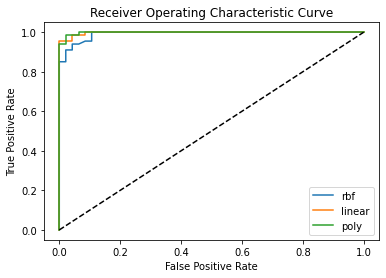

In [152]:
from sklearn.metrics import roc_curve, roc_auc_score
for name, model in models:
    model.fit(train_x, train_y)
    prob = model.predict_proba(test_x)
    fper, tper, thresholds = roc_curve(test_y, prob[:,1])
    print(f'ROC AUC ({name}): {roc_auc_score(test_y, prob[:,1]):.4f}')
    plt.plot(fper, tper, label=name)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. 

In [150]:
def get_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    TN = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    accuracy = (TP + TN) / float(TP + TN + FP + FN)
    precision = TP / float(TP + FP)
    recall = TP / float(TP + FN)
    fscore = 2*precision*recall / (precision+recall)
    return accuracy, precision, recall, fscore

Metrics (train): Accuracy=0.9890, Precision=0.9697, Recall=1.0000, F-score=0.9846
Metrics (test): Accuracy=0.9737, Precision=0.9787, Recall=0.9583, F-score=0.9684


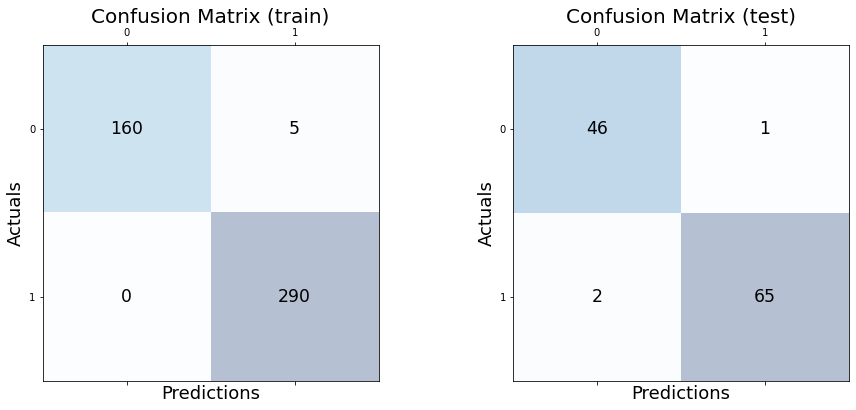

In [151]:
name, best_model = models[2]
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.4, hspace=0.1)
for i, mode in enumerate(workflow):
    if mode == 'train':
        pred = model.predict(train_x)
        cm = confusion_matrix(train_y, pred)
        axes[i].matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    else:
        pred = model.predict(test_x)
        cm = confusion_matrix(test_y, pred)
        axes[i].matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            axes[i].text(x=j, y=k,s=cm[k, j], va='center', ha='center', size='xx-large')
    axes[i].set_title(f"Confusion Matrix ({mode})", fontsize = 20)
    axes[i].set_xlabel('Predictions', fontsize = 18)
    axes[i].set_ylabel('Actuals', fontsize = 18)
    accuracy, precision, recall, fscore = get_metrics(cm)
    print(f'Metrics ({mode}): Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F-score={fscore:.4f}')